In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
def generate_step(seed, p, size):
    rng = np.random.default_rng(seed)
    steps = rng.choice([-1, 1], p=[p, 1-p], size=size)
    return steps

In [4]:
def generate_walk_boundary(x0,steps):
    pos=x0
    pos_list=np.zeros(steps.shape[0]+1, dtype=int)
    for idx,step in enumerate(steps):
        if pos + step >= 0:
            pos += step
            pos_list[idx+1] = pos
    return pos_list

In [5]:
steps = generate_step(1, 0.5, 100)

In [6]:
generate_walk_boundary(0,steps)

array([ 0,  1,  2,  1,  2,  1,  0,  1,  0,  1,  0,  1,  2,  1,  2,  1,  0,
        0,  0,  0,  0,  1,  0,  0,  1,  2,  3,  4,  3,  2,  3,  4,  3,  4,
        5,  6,  7,  6,  7,  6,  5,  6,  7,  8,  7,  8,  9, 10, 11, 10, 11,
       12, 13, 12, 13, 12, 11, 12, 13, 14, 13, 12, 11, 12, 13, 14, 13, 12,
       13, 14, 15, 14, 13, 14, 13, 14, 13, 14, 15, 16, 17, 18, 17, 18, 17,
       18, 17, 18, 17, 16, 15, 16, 15, 14, 13, 12, 11, 10, 11, 10, 11])

In [7]:
def walk(seed, p, size, x0):
    steps = generate_step(seed, p, size)
    return generate_walk_boundary(x0,steps)

In [8]:
seed_list = np.arange(10000)
size=600
pos_map=np.zeros((seed_list.shape[0],size+1),dtype=int)
for seed in seed_list:
    pos_map[seed] = walk(seed, 0.5, size, 1)
var_pos = np.var(pos_map, axis=0)

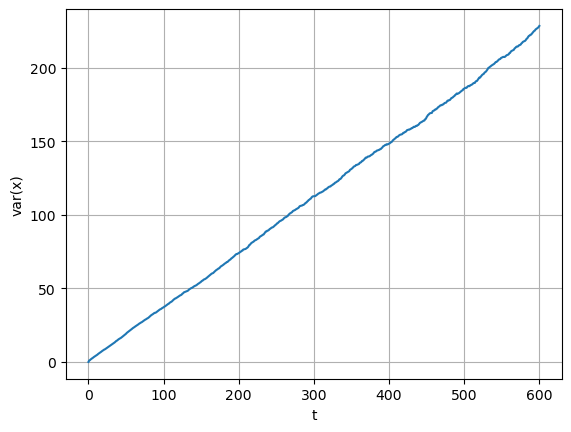

In [9]:
# plt.plot(np.mean(pos_map,axis=0))
plt.plot(var_pos)
plt.xlabel('t')
plt.ylabel('var(x)')
plt.grid()

In [106]:
np.polyfit(np.arange(size+1), var_pos, 1)

array([ 0.37364323, -0.23651266])

In [121]:
seed_list = np.arange(10000)
size=150
pos_map=np.zeros((seed_list.shape[0],size+1),dtype=int)
for seed in seed_list:
    pos_map[seed] = walk(seed, 0.6, size, 1)
var_pos = np.var(pos_map, axis=0)


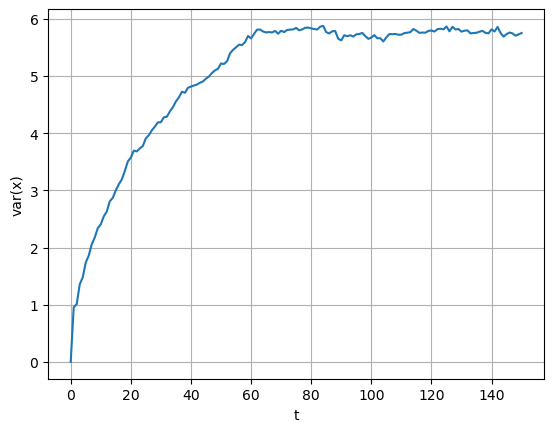

In [122]:
plt.plot(var_pos)
plt.xlabel('t')
plt.ylabel('var(x)')
plt.grid()

In [116]:
seed_list = np.arange(10000)
size=150
pos_map=np.zeros((seed_list.shape[0],size+1),dtype=int)
for seed in seed_list:
    pos_map[seed] = walk(seed, 0.4, size, 1)
var_pos = np.var(pos_map, axis=0)


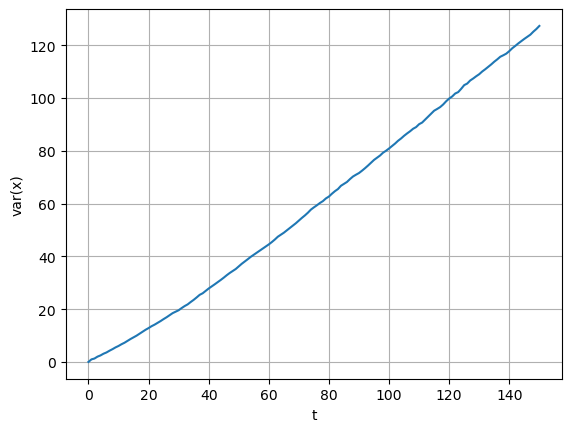

In [117]:
plt.plot(var_pos)
plt.xlabel('t')
plt.ylabel('var(x)')
plt.grid()

# First hit time

In [10]:
def generate_walk_stop(x0,steps,stop):
    pos=x0
    pos_list=np.zeros(steps.shape[0]+1, dtype=int)
    for idx,step in enumerate(steps):
        if pos + step >= 0:
            pos += step
            pos_list[idx+1] = pos
        if pos == stop:
            break
    if pos != stop:
        return np.nan
    return idx

In [26]:
def walk_stop(seed, p, size, x0,L):
    print(seed,L)
    steps = generate_step(seed, p, size)
    return generate_walk_stop(x0,steps,L)

In [19]:
L_list = [10,20,30,40]
seed_list = np.arange(1000)

# stop_time=np.array([walk_stop(seed,0.5,10000,1,30) for seed in seed_list])
stop_time_0p4=[np.array([walk_stop(seed,0.4,10000,1,L) for seed in seed_list]).mean()  for L in L_list]

In [ ]:
stop_time.max()

In [34]:
stop_time.mean()

107.1401

In [37]:
stop_time.mean()

419.9831

In [39]:
stop_time.mean()

927.9679

In [21]:
stop_time_0p4

[35.794, 85.761, 135.72, 187.63]

Text(0, 0.5, 't_stop')

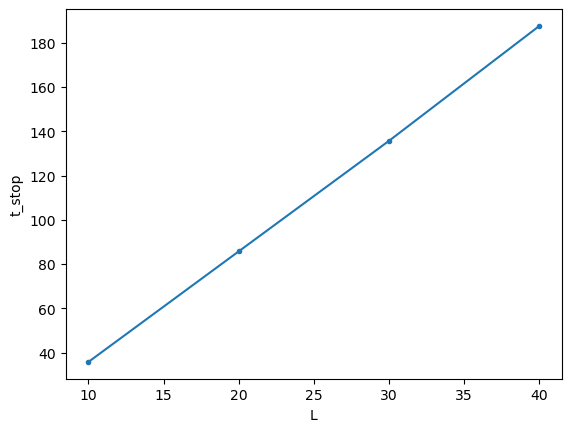

In [20]:
plt.plot(L_list,stop_time_0p4,'.-')
# plt.plot(np.power(L_list,2),stop_time_0p4,'.-')
plt.xlabel('L')
plt.ylabel('t_stop')

In [22]:
L_list = [10,20,30,40]
stop_time_0p5=[np.array([walk_stop(seed,0.5,10000,1,L) for seed in seed_list]).mean()  for L in L_list]

In [41]:
stop_time.max()

280

In [42]:
stop_time.mean()

37.3289

In [44]:
stop_time.mean()

87.3761

In [46]:
stop_time.mean()

137.8573

Text(0, 0.5, 't_stop')

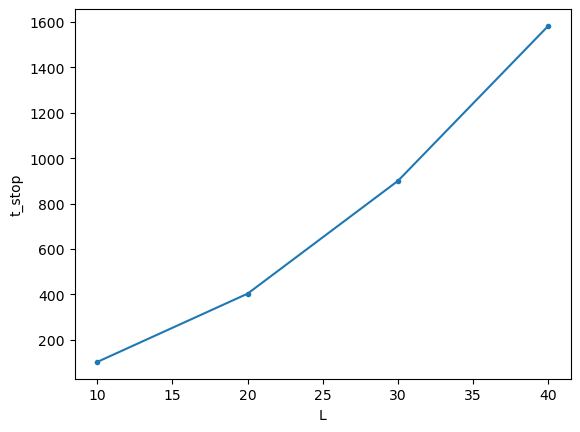

In [24]:
plt.plot(L_list,stop_time_0p5,'.-')
plt.xlabel('L')
plt.ylabel('t_stop')

In [25]:
stop_time_0p5

[101.95, 402.823, 899.639, 1582.556]

In [47]:
# stop_time=np.array([walk_stop(seed,0.6,10000,1,20) for seed in seed_list])
seed_list = np.arange(100)
L_list=[10,15,20,25,30]
stop_time_0p6=[np.nanmean(np.array([walk_stop(seed,0.6,1000000,1,L) for seed in seed_list]))  for L in L_list]

0 10
1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
10 10
11 10
12 10
13 10
14 10
15 10
16 10
17 10
18 10
19 10
20 10
21 10
22 10
23 10
24 10
25 10
26 10
27 10
28 10
29 10
30 10
31 10
32 10
33 10
34 10
35 10
36 10
37 10
38 10
39 10
40 10
41 10
42 10
43 10
44 10
45 10
46 10
47 10
48 10
49 10
50 10
51 10
52 10
53 10
54 10
55 10
56 10
57 10
58 10
59 10
60 10
61 10
62 10
63 10
64 10
65 10
66 10
67 10
68 10
69 10
70 10
71 10
72 10
73 10
74 10
75 10
76 10
77 10
78 10
79 10
80 10
81 10
82 10
83 10
84 10
85 10
86 10
87 10
88 10
89 10
90 10
91 10
92 10
93 10
94 10
95 10
96 10
97 10
98 10
99 10
0 15
1 15
2 15
3 15
4 15
5 15
6 15
7 15
8 15
9 15
10 15
11 15
12 15
13 15
14 15
15 15
16 15
17 15
18 15
19 15
20 15
21 15
22 15
23 15
24 15
25 15
26 15
27 15
28 15
29 15
30 15
31 15
32 15
33 15
34 15
35 15
36 15
37 15
38 15
39 15
40 15
41 15
42 15
43 15
44 15
45 15
46 15
47 15
48 15
49 15
50 15
51 15
52 15
53 15
54 15
55 15
56 15
57 15
58 15
59 15
60 15
61 15
62 15
63 15
64 15
65 15
66 15
67 15
68 15
69 15


In [49]:
stop_time_0p6

[808.4, 8111.34, 51629.56, 280926.7368421053, 370079.45945945947]

In [ ]:
stop_time.max()

9999

In [49]:
stop_time.mean()

794.4996

In [52]:
stop_time.mean()

9076.3289

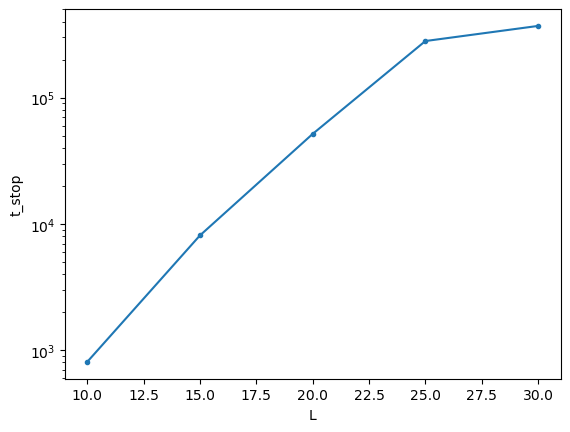

In [48]:
plt.plot(L_list,stop_time_0p6,'.-')
plt.xlabel('L')
plt.ylabel('t_stop')
plt.yscale('log')

In [ ]:
seed_list = np.arange(10000)
size=600
pos_map=np.zeros((seed_list.shape[0],size+1),dtype=int)
for seed in seed_list:
    pos_map[seed] = walk(seed, 0.5, size, 1)
# var_pos = np.var(pos_map, axis=0)

# Double ended random walk

In [180]:
def generate_walk_bounded(x0,steps,left):
    pos=x0
    pos_list=np.zeros(steps.shape[0]+1, dtype=int)
    pos_list[0]=pos
    for idx,step in enumerate(steps):
        pos_next = pos + step
        if  pos_next >= 0 and pos_next<left :
            pos = pos_next
        pos_list[idx+1] = pos
    return pos_list

In [135]:
steps=generate_step(seed=1, p=0.4, size=100)

In [64]:
steps

array([ 1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1, -1,
        1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1])

In [212]:
num_seed=50000
L=30
traj=np.array([generate_walk_bounded(1, 
generate_step(seed=seed, p=0.4, size=2*L**2),
L) for seed in range(num_seed)])

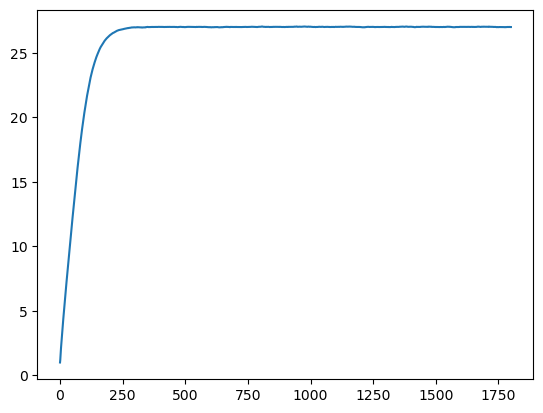

In [213]:
plt.plot(traj.mean(axis=0))

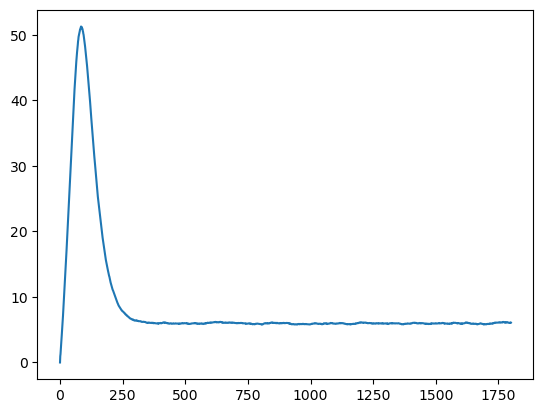

In [214]:
plt.plot(traj.var(axis=0))

In [215]:
'{:.3f},{:.3f}'.format(traj.var(axis=0)[-1], traj.var(axis=0)[-1]*np.sqrt(2/(num_seed-1)))

'6.066,0.038'

In [126]:
traj.var(axis=0)[-1], traj.var(axis=0)[-1]*np.sqrt(2/(num_seed-1))

(4.125438039999779, 0.05834542161299175)

In [71]:
steps=generate_step(seed=1, p=0.5, size=100)

In [72]:
steps

array([ 1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1,  1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,
        1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  1,
        1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1])

In [73]:
traj=np.array([generate_walk_bounded(1, 
generate_step(seed=seed, p=0.5, size=300),
10) for seed in range(100000)])

In [74]:
traj[0]

array([1, 2, 1, 0, 0, 1, 2, 3, 4, 5, 6, 7, 6, 7, 6, 7, 6, 7, 8, 7, 6, 5,
       4, 5, 6, 7, 6, 7, 8, 9, 9, 9, 8, 7, 8, 9, 8, 7, 8, 9, 8, 9, 8, 9,
       8, 7, 8, 7, 8, 7, 8, 9, 8, 9, 8, 7, 6, 5, 6, 5, 4, 3, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 2, 3, 2, 3, 4, 3, 4, 5,
       6, 5, 6, 7, 8, 7, 8, 9, 9, 8, 9, 9, 9, 8, 7, 8, 9, 8, 9, 8, 9, 8,
       9, 9, 8, 9, 8, 9, 9, 9, 8, 9, 8, 7, 6, 7, 8, 7, 6, 7, 6, 5, 4, 5,
       6, 7, 8, 7, 6, 7, 8, 9, 8, 9, 9, 9, 8, 7, 8, 7, 8, 7, 8, 7, 6, 5,
       6, 5, 6, 7, 6, 7, 6, 5, 4, 3, 4, 5, 4, 3, 4, 5, 6, 5, 6, 5, 4, 5,
       6, 7, 8, 9, 9, 9, 8, 7, 8, 9, 8, 7, 8, 9, 9, 8, 9, 9, 8, 9, 9, 8,
       9, 9, 9, 8, 7, 8, 7, 8, 9, 9, 8, 7, 8, 7, 6, 5, 6, 5, 4, 5, 4, 5,
       6, 7, 6, 5, 4, 5, 6, 5, 4, 5, 4, 5, 4, 5, 6, 5, 6, 5, 6, 5, 6, 5,
       6, 7, 6, 7, 8, 9, 9, 8, 9, 8, 7, 8, 9, 8, 7, 8, 7, 8, 9, 9, 8, 9,
       8, 7, 6, 7, 6, 5, 4, 5, 6, 5, 6, 7, 8, 9, 8, 9, 9, 9, 9, 9, 8, 9,
       9, 8, 9, 9, 8, 7, 6, 5, 4, 3, 4, 3, 4, 5, 6]

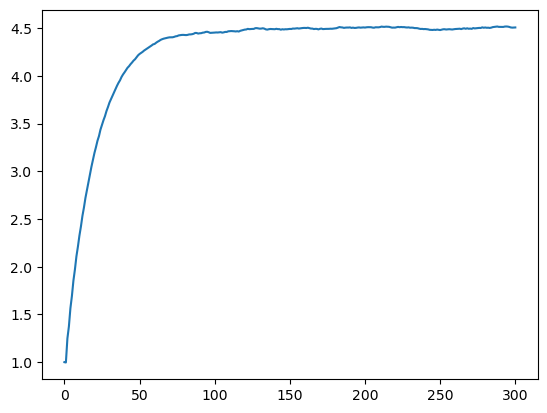

In [75]:
plt.plot(traj.mean(axis=0))

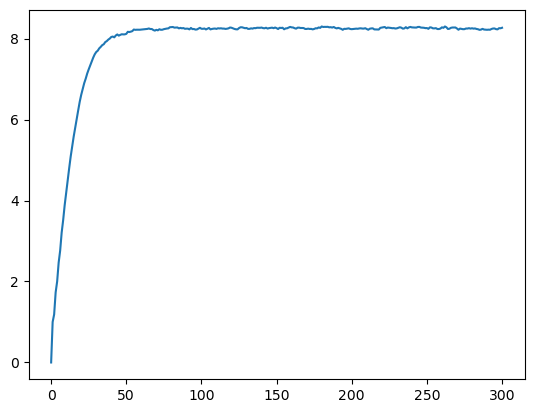

In [76]:
plt.plot(traj.var(axis=0))

In [77]:
traj.var(axis=0)[-1]

8.26631537759987

In [78]:
traj=np.array([generate_walk_bounded(1, 
generate_step(seed=seed, p=0.6, size=300),
10) for seed in range(100000)])

In [79]:
traj[0]

array([1, 2, 1, 0, 0, 1, 2, 3, 4, 3, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 2, 1,
       0, 1, 2, 3, 2, 3, 4, 5, 6, 7, 6, 5, 6, 5, 4, 3, 4, 5, 4, 3, 2, 1,
       0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 2, 3,
       4, 3, 4, 5, 6, 5, 6, 7, 8, 7, 8, 9, 9, 8, 7, 8, 9, 8, 7, 6, 7, 6,
       7, 8, 7, 8, 7, 8, 7, 8, 7, 8, 7, 6, 5, 6, 5, 4, 3, 4, 3, 2, 1, 0,
       0, 1, 0, 0, 0, 1, 2, 3, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1,
       2, 3, 4, 5, 6, 7, 6, 5, 6, 7, 6, 5, 6, 5, 4, 3, 2, 1, 0, 1, 0, 0,
       1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       2, 3, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 2, 3, 4, 5, 4, 5, 4, 3, 4, 5, 4, 3, 4, 3, 4, 5, 6, 5, 6,
       5, 4, 3, 2, 1, 0, 0, 1, 2, 1, 2, 3, 4, 5, 4, 5, 6, 5, 6, 7, 6, 7,
       8, 7, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 2, 3]

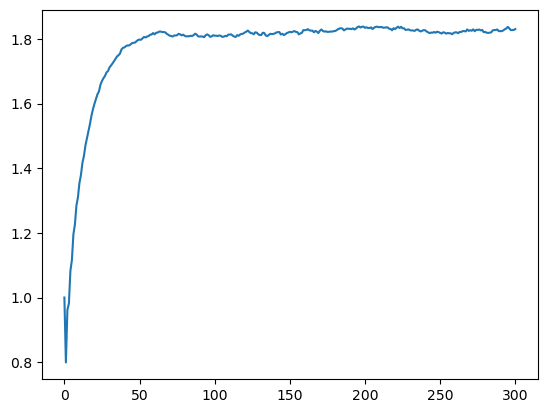

In [80]:
plt.plot(traj.mean(axis=0))

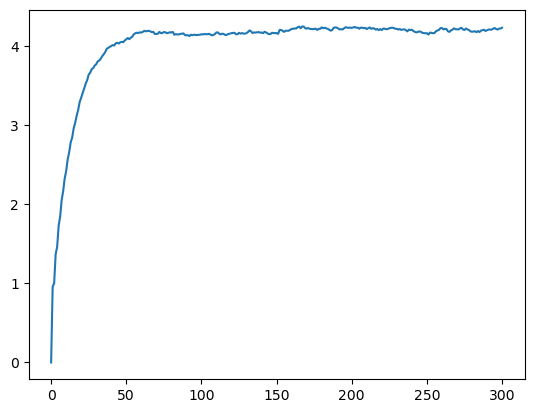

In [81]:
plt.plot(traj.var(axis=0))

In [82]:
traj.var(axis=0)[-1]

4.237176359901182

In [60]:
traj.var(axis=0)[-1]

4.549130118400075

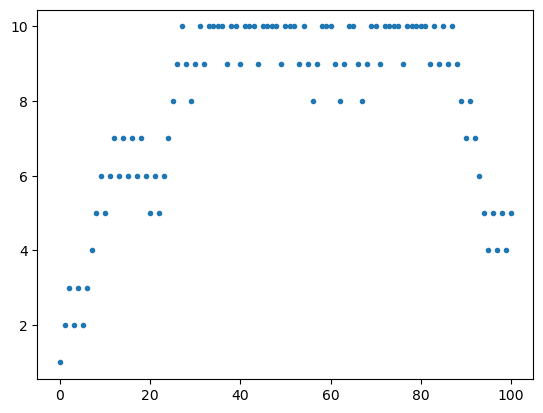

In [38]:
plt.plot(traj,'.')